In [12]:
!pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=3db1f6cf7781374f769b5b416956ba9b9f6a19de60b4ee0cb7dca5c524c3cac5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [7]:
  
import os
import zipfile

local_zip = r'D:\CNN horse or human\horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'D:\CNN horse or human\horse-or-human')
local_zip = r'D:\CNN horse or human\validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'D:\CNN horse or human\validation-horse-or-human')
zip_ref.close()


In [8]:
# Directory with our training horse pictures
train_horse_dir = os.path.join(r"D:\CNN horse or human\horse-or-human\horses")

# Directory with our training human pictures
train_human_dir = os.path.join(r"D:\CNN horse or human\horse-or-human\humans")

# Directory with our training horse pictures
validation_horse_dir = os.path.join(r"D:\CNN horse or human\validation-horse-or-human\horses")

# Directory with our training human pictures
validation_human_dir = os.path.join(r"D:\CNN horse or human\validation-horse-or-human\humans")

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        "D:\CNN\horse-or-human",  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r"D:\CNN\validation-horse-or-human",  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/100
8/8 [==============================] - 86s 10s/step - loss: 0.6855 - acc: 0.4939 - val_loss: 0.6771 - val_acc: 0.5039
Epoch 2/100
8/8 [==============================] - 59s 7s/step - loss: 0.6664 - acc: 0.6151 - val_loss: 0.6711 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 63s 8s/step - loss: 0.6403 - acc: 0.6529 - val_loss: 0.6488 - val_acc: 0.5547
Epoch 4/100
8/8 [==============================] - 64s 8s/step - loss: 0.6529 - acc: 0.6340 - val_loss: 0.7313 - val_acc: 0.5039
Epoch 5/100
8/8 [==============================] - 64s 8s/step - loss: 0.5918 - acc: 0.6808 - val_loss: 0.5483 - val_acc: 0.8359
Epoch 6/100
8/8 [==============================] - 65s 8s/step - loss: 0.5835 - acc: 0.6930 - val_loss: 0.6514 - val_acc: 0.5938
Epoch 7/100
8/8 [==============================] - 62s 7s/step - loss: 0.5780 - acc: 0.7086 - val_loss: 0.7099 - val_acc: 0.5586
Epoch 8/100
8

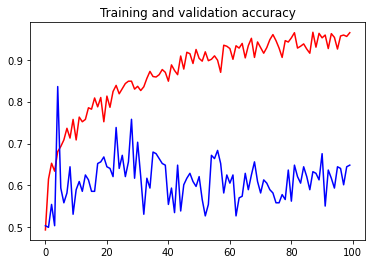

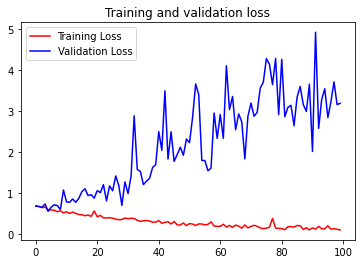

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()